In [1]:
import numpy as np
import matplotlib.pyplot as plt

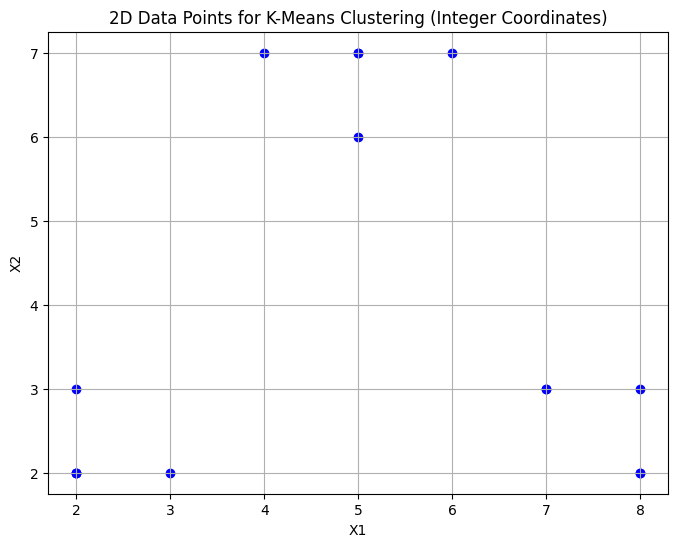

In [2]:
np.random.seed(42)

cluster_1 = np.round(np.random.normal(loc=[2, 2], scale=0.5, size=(5, 2))).astype(int)
cluster_2 = np.round(np.random.normal(loc=[8, 3], scale=0.5, size=(5, 2))).astype(int)
cluster_3 = np.round(np.random.normal(loc=[5, 7], scale=0.5, size=(5, 2))).astype(int)

data_points = np.vstack((cluster_1, cluster_2, cluster_3))

plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c='blue', marker='o')
plt.title('2D Data Points for K-Means Clustering (Integer Coordinates)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [28]:
def k_clustering(data_points, center_points = None, k = None):

    # center_points are the points that clusters will form upon
    if center_points is None and k is not None:
        center_points = data_points[np.random.choice(data_points.shape[0], size=k, replace=False)]


    # for broadcast compatibility we reshape center points and data points
    center_points_reshaped = center_points[:, np.newaxis, :]
    data_points_reshaped = data_points[np.newaxis, :,  :]

    # we calculate the Euclidian distance with center points and data points using array broadcasting
    x = center_points_reshaped[:,0,0].reshape((1, k)) - data_points_reshaped[0,:,0].reshape((data_points.shape[0], 1))
    y = center_points_reshaped[:,0,1].reshape((1, k)) - data_points_reshaped[0,:,1].reshape((data_points.shape[0], 1))
    # it's an np array that will be like this (n, k)
    euclidian_distance = np.sqrt(x**2 + y**2)

    # from euclidian distance we take the indice of the column with the minimum value for each row
    min_indices = np.argmin(euclidian_distance, axis=1)
    min_indices_matrix = min_indices.reshape(-1, 1)

    # we concatenante the cluster labels with the datapoints
    data_points_cluster = np.concatenate((data_points, min_indices_matrix), axis=1)

    # Extract x, y, and cluster labels
    x = data_points_cluster[:, 0]
    y = data_points_cluster[:, 1]
    clusters = data_points_cluster[:, 2]

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(center_points[:, 0], center_points[:, 1], c=[i for i in range(k)], marker='x', s=200, linewidths=1, label='Cluster Centers')
    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('2D Data Points Colored by Cluster')
    # Show the plot
    plt.show()

    # Return the data_points concatenated with the labels
    return data_points_cluster



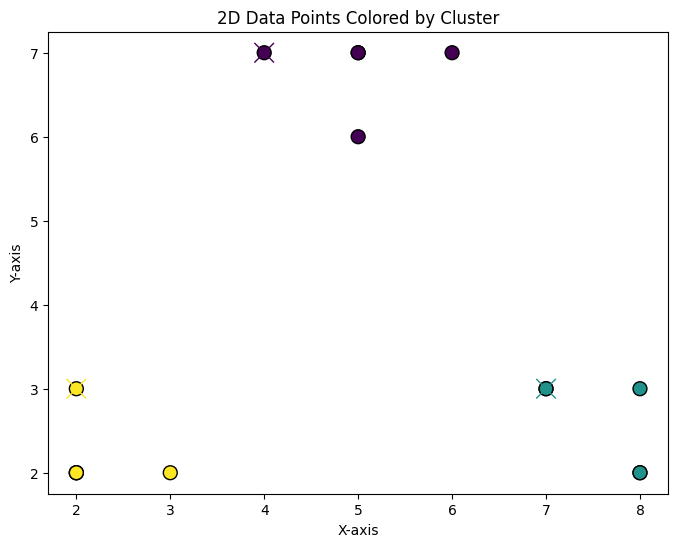

array([[2, 2, 2],
       [2, 3, 2],
       [2, 2, 2],
       [3, 2, 2],
       [2, 2, 2],
       [8, 3, 1],
       [8, 2, 1],
       [7, 3, 1],
       [7, 3, 1],
       [8, 2, 1],
       [6, 7, 0],
       [5, 6, 0],
       [5, 7, 0],
       [4, 7, 0],
       [5, 7, 0]])

In [29]:
k_clustering(data_points, None, k=3)

In [113]:
def mean_center_points(labeled_data_points):
    sorted_data = labeled_data_points[np.argsort(labeled_data_points[:, 2])]
    _, counts = np.unique(sorted_data[:, 2], return_counts=True)
    split_data = np.split(sorted_data, np.cumsum(counts)[:-1])
    split_data_mean = [ (np.mean(group[:,0]), np.mean(group[:,1])) for group in split_data]
    return np.array(split_data_mean)


def k_means_clustering(data_points, k):
    prev_center_points = np.zeros((k,2))
    center_points = data_points[np.random.choice(data_points.shape[0], size=k, replace=False)]
    while(not np.array_equal(prev_center_points, center_points)):
        labeled_data_points = k_clustering(data_points, center_points, k)
        prev_center_points = center_points
        center_points = mean_center_points(labeled_data_points)

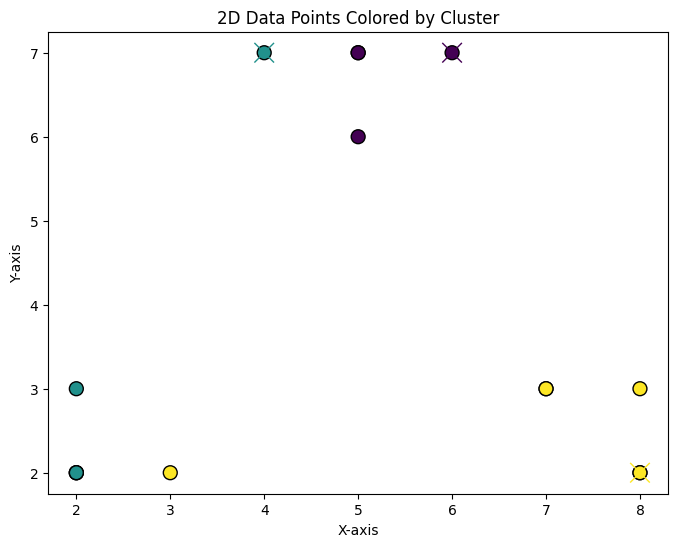

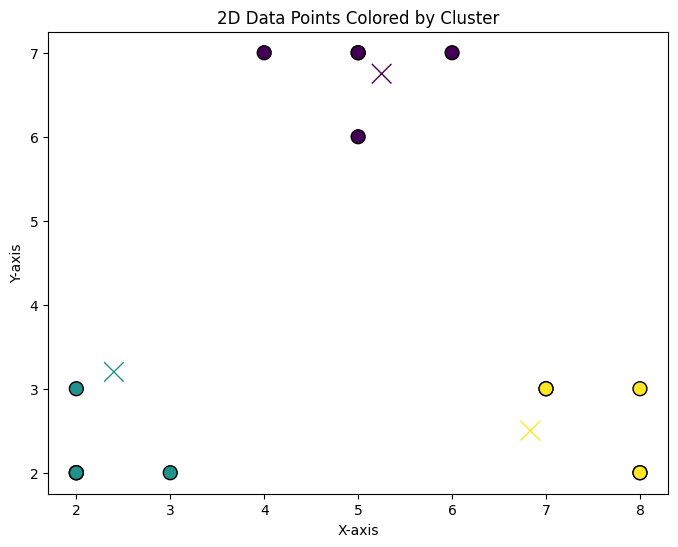

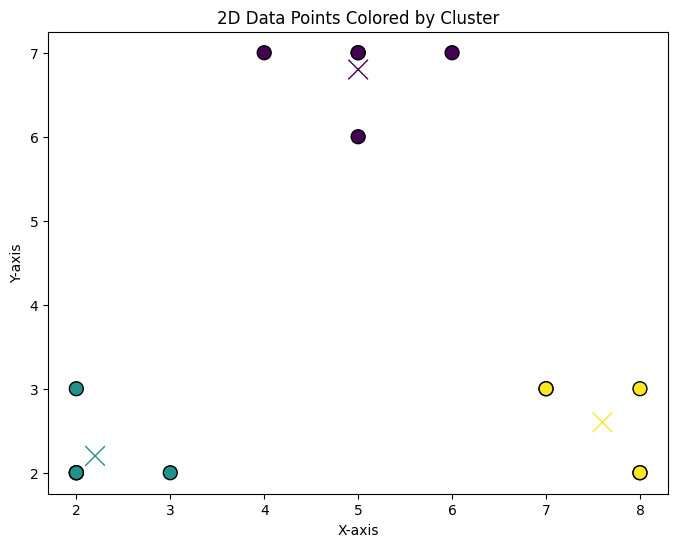

In [116]:
k_means_clustering(data_points, 3)